In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize
from scipy.linalg import eigh

## 2a)

The difference equations for a 1D string are 
$$\dfrac{d^2f}{dx^2}=-\omega^2\rho(x)f$$

Which can be written as

$$\dfrac{-f_{i+1}+2f_i-f_{i-1}}{(\Delta x)^2}=\omega^2\rho_if_i$$
This is of the same form as the matrix equation given in the question:
$$A\cdot f=\omega^2b\cdot f$$
where $A$ is a tri-diagonal matrix $\dfrac{2}{(\Delta x)^2}$ along the main diagonal flanked by $\dfrac{-1}{(\Delta x)^2}$ on either sides. $b$ is a diagonal matrix with the density value assigned to each position along the diagonal.  $\omega$ is the frequency.

## b)

In [2]:
N = 1000   # number of gridpoints
dx = 1/N   # size of gridpoint for rod of length = 1

A = np.zeros((N,N))
i,j = np.indices(A.shape)

A[i==j] = 2. / dx**2
A[i==j-1] = -1. / dx**2
A[i==j+1] = -1. / dx**2

# Impose boundary condition on A matrix
A[0,:] = 0.
A[-1,:] = 0.

print(A)

[[       0.        0.        0. ...        0.        0.        0.]
 [-1000000.  2000000. -1000000. ...        0.        0.        0.]
 [       0. -1000000.  2000000. ...        0.        0.        0.]
 ...
 [       0.        0.        0. ...  2000000. -1000000.        0.]
 [       0.        0.        0. ... -1000000.  2000000. -1000000.]
 [       0.        0.        0. ...        0.        0.        0.]]


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


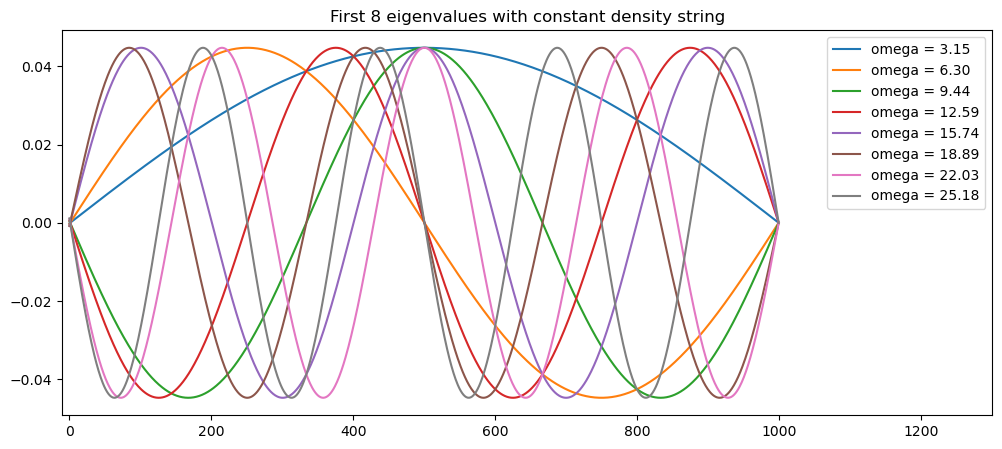

In [6]:
b = np.zeros((N,N))
b[range(N),range(N)] = 1. # sometimes this doesnt work
print(b)

plt.figure(figsize=(12,5))
plt.title('First 8 eigenvalues with constant density string')
plt.xlim(-10,1.3*N)
for i in range(8):
    w2, v = eigh(A,b=b, subset_by_index=[i+2, i+2])
    omega = np.sqrt(w2)
    plt.plot(v,label = 'omega = %.2f'%omega)
plt.legend()

This gives the same results for the shooting method except that the amplitudes are not normalized.

[[ 1.       0.       0.      ...  0.       0.       0.     ]
 [ 0.       1.00001  0.      ...  0.       0.       0.     ]
 [ 0.       0.       1.00004 ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ... 10.94009  0.       0.     ]
 [ 0.       0.       0.      ...  0.      10.96004  0.     ]
 [ 0.       0.       0.      ...  0.       0.      10.98001]]


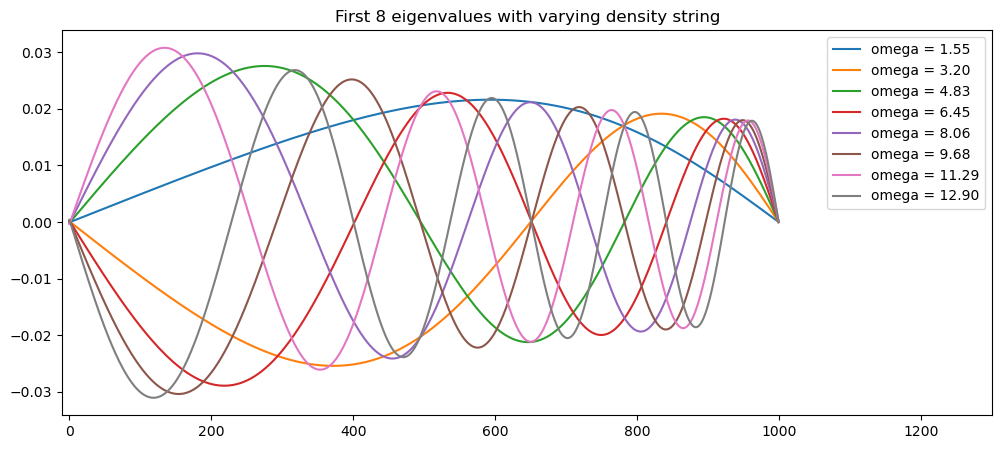

In [8]:
# Construct density matrix
b = np.zeros((N,N))
b[range(N),range(N)] = range(N)
c = 10*(b*dx)**2
d = np.zeros((N,N))
d[range(N),range(N)] = 1.
density = c + d

print(density)

plt.figure(figsize=(12,5))
plt.xlim(-10,1.3*N)
plt.title('First 8 eigenvalues with varying density string')
for i in range(8):
    w2, v = eigh(A,b=density, subset_by_index=[i+2, i+2])
    omega = np.sqrt(w2)
    plt.plot(v,label = 'omega = %.2f'%omega)
plt.legend()

Again, this gives the same results for the shooting method except that the amplitudes are not normalized.